In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler

In [60]:
listing=pd.read_csv('listings.csv')

In [61]:
print(listing.shape)
listing.head()

(86358, 16)


id                                               name  host_id  \
0  13913                Holiday London DB Room Let-on going    54730   
1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

   host_name  neighbourhood_group           neighbourhood  latitude  \
0      Alina                  NaN               Islington  51.56802   
1   Philippa                  NaN  Kensington and Chelsea  51.48796   
2        Liz                  NaN             Westminster  51.52195   
3  Charlotte                  NaN  Hammersmith and Fulham  51.47935   
4     Amanda                  NaN              Wandsworth  51.44687   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11121     Private room     65               1                 21   
1   -0.16898  Entire home/apt    100              10                 89   
2   -0.14094  Entire home/apt    300               3                 42   
3   -0.19743     Private room    150               3                  0   
4   -0.21874  Entire home/apt     65              21                 35   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2020-02-22               0.18                               2   
1  2020-03-16               0.71                               1   
2  2019-11-02               0.38                              15   
3         NaN                NaN                               2   
4  2020-03-30               0.70                               1   

   availability_365  
0               359  
1               232  
2               307  
3               362  
4                15

In [62]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86358 entries, 0 to 86357
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              86358 non-null  int64  
 1   name                            86334 non-null  object 
 2   host_id                         86358 non-null  int64  
 3   host_name                       86348 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   86358 non-null  object 
 6   latitude                        86358 non-null  float64
 7   longitude                       86358 non-null  float64
 8   room_type                       86358 non-null  object 
 9   price                           86358 non-null  int64  
 10  minimum_nights                  86358 non-null  int64  
 11  number_of_reviews               86358 non-null  int64  
 12  last_review                     

In [63]:
listing.drop_duplicates(subset=None, keep="first", inplace=True)
print(listing.shape)
listing.isnull().sum()

(86358, 16)


id                                    0
name                                 24
host_id                               0
host_name                            10
neighbourhood_group               86358
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21516
reviews_per_month                 21516
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [64]:
listing=listing.drop(['neighbourhood_group'],axis=1)
listing.head()

id                                               name  host_id  \
0  13913                Holiday London DB Room Let-on going    54730   
1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

   host_name           neighbourhood  latitude  longitude        room_type  \
0      Alina               Islington  51.56802   -0.11121     Private room   
1   Philippa  Kensington and Chelsea  51.48796   -0.16898  Entire home/apt   
2        Liz             Westminster  51.52195   -0.14094  Entire home/apt   
3  Charlotte  Hammersmith and Fulham  51.47935   -0.19743     Private room   
4     Amanda              Wandsworth  51.44687   -0.21874  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     65               1                 21  2020-02-22               0.18   
1    100              10                 89  2020-03-16               0.71   
2    300               3                 42  2019-11-02               0.38   
3    150               3                  0         NaN                NaN   
4     65              21                 35  2020-03-30               0.70   

   calculated_host_listings_count  availability_365  
0                               2               359  
1                               1               232  
2                              15               307  
3                               2               362  
4                               1                15

In [65]:
print("Number of Neighbourhood:")
print(len(listing["neighbourhood"].unique()))


print("")
print("Average Price:")
print(round(listing.price.mean(),2))


print("")
print("Maximum Price:")
print(round(listing.price.max(),2))


print("")
print("Minimum Price:")
print(round(listing.price.min(),2))


print("")
print("Number of 0 (Zero) Price:")
print(len(listing[listing["price"]==0]))

print("")
print("Average Number of Reviews:")
print(round(listing.number_of_reviews.mean(),2))
print("")
print("Number of 0 (Zero) Price:")
print(len(listing[listing["number_of_reviews"]==0]))

Number of Neighbourhood:
33

Average Price:
129.61

Maximum Price:
19985

Minimum Price:
0

Number of 0 (Zero) Price:
19

Average Number of Reviews:
17.53

Number of 0 (Zero) Price:
21516


In [68]:
def groups(df,cname,rename,rn=0,p=0):
    dummy_df=df.groupby(cname).id.count().sort_values(ascending=False)
    dummy_df = dummy_df.reset_index()
    if(rn):
        dummy_df.rename(columns={rename[0]:rename[1]}, inplace=True)
    if(p):
        dummy_df["percentage"]=round(dummy_df["count"] / dummy_df["count"].sum()*100,2)
    return dummy_df
def plotdata(df,X,Y):
    plt.figure(figsize=(15,10),dpi=200),
    plt.style.use('default')
    ax = sns.barplot(x=X, y=Y, data=df)
    plt.title("Disturibution", weight="bold", c="red", fontsize=15)
    plt.xlabel("",weight="bold",c="k")
    plt.xticks(rotation=90, weight="bold")
    plt.ylabel(Y,weight= "bold",c="k")
    plt.yticks(weight="bold")
    for p in ax.patches:
            ax.annotate('{:.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                        ha='center', va='bottom',weight="bold",
                        color= 'black')
    plt.show()

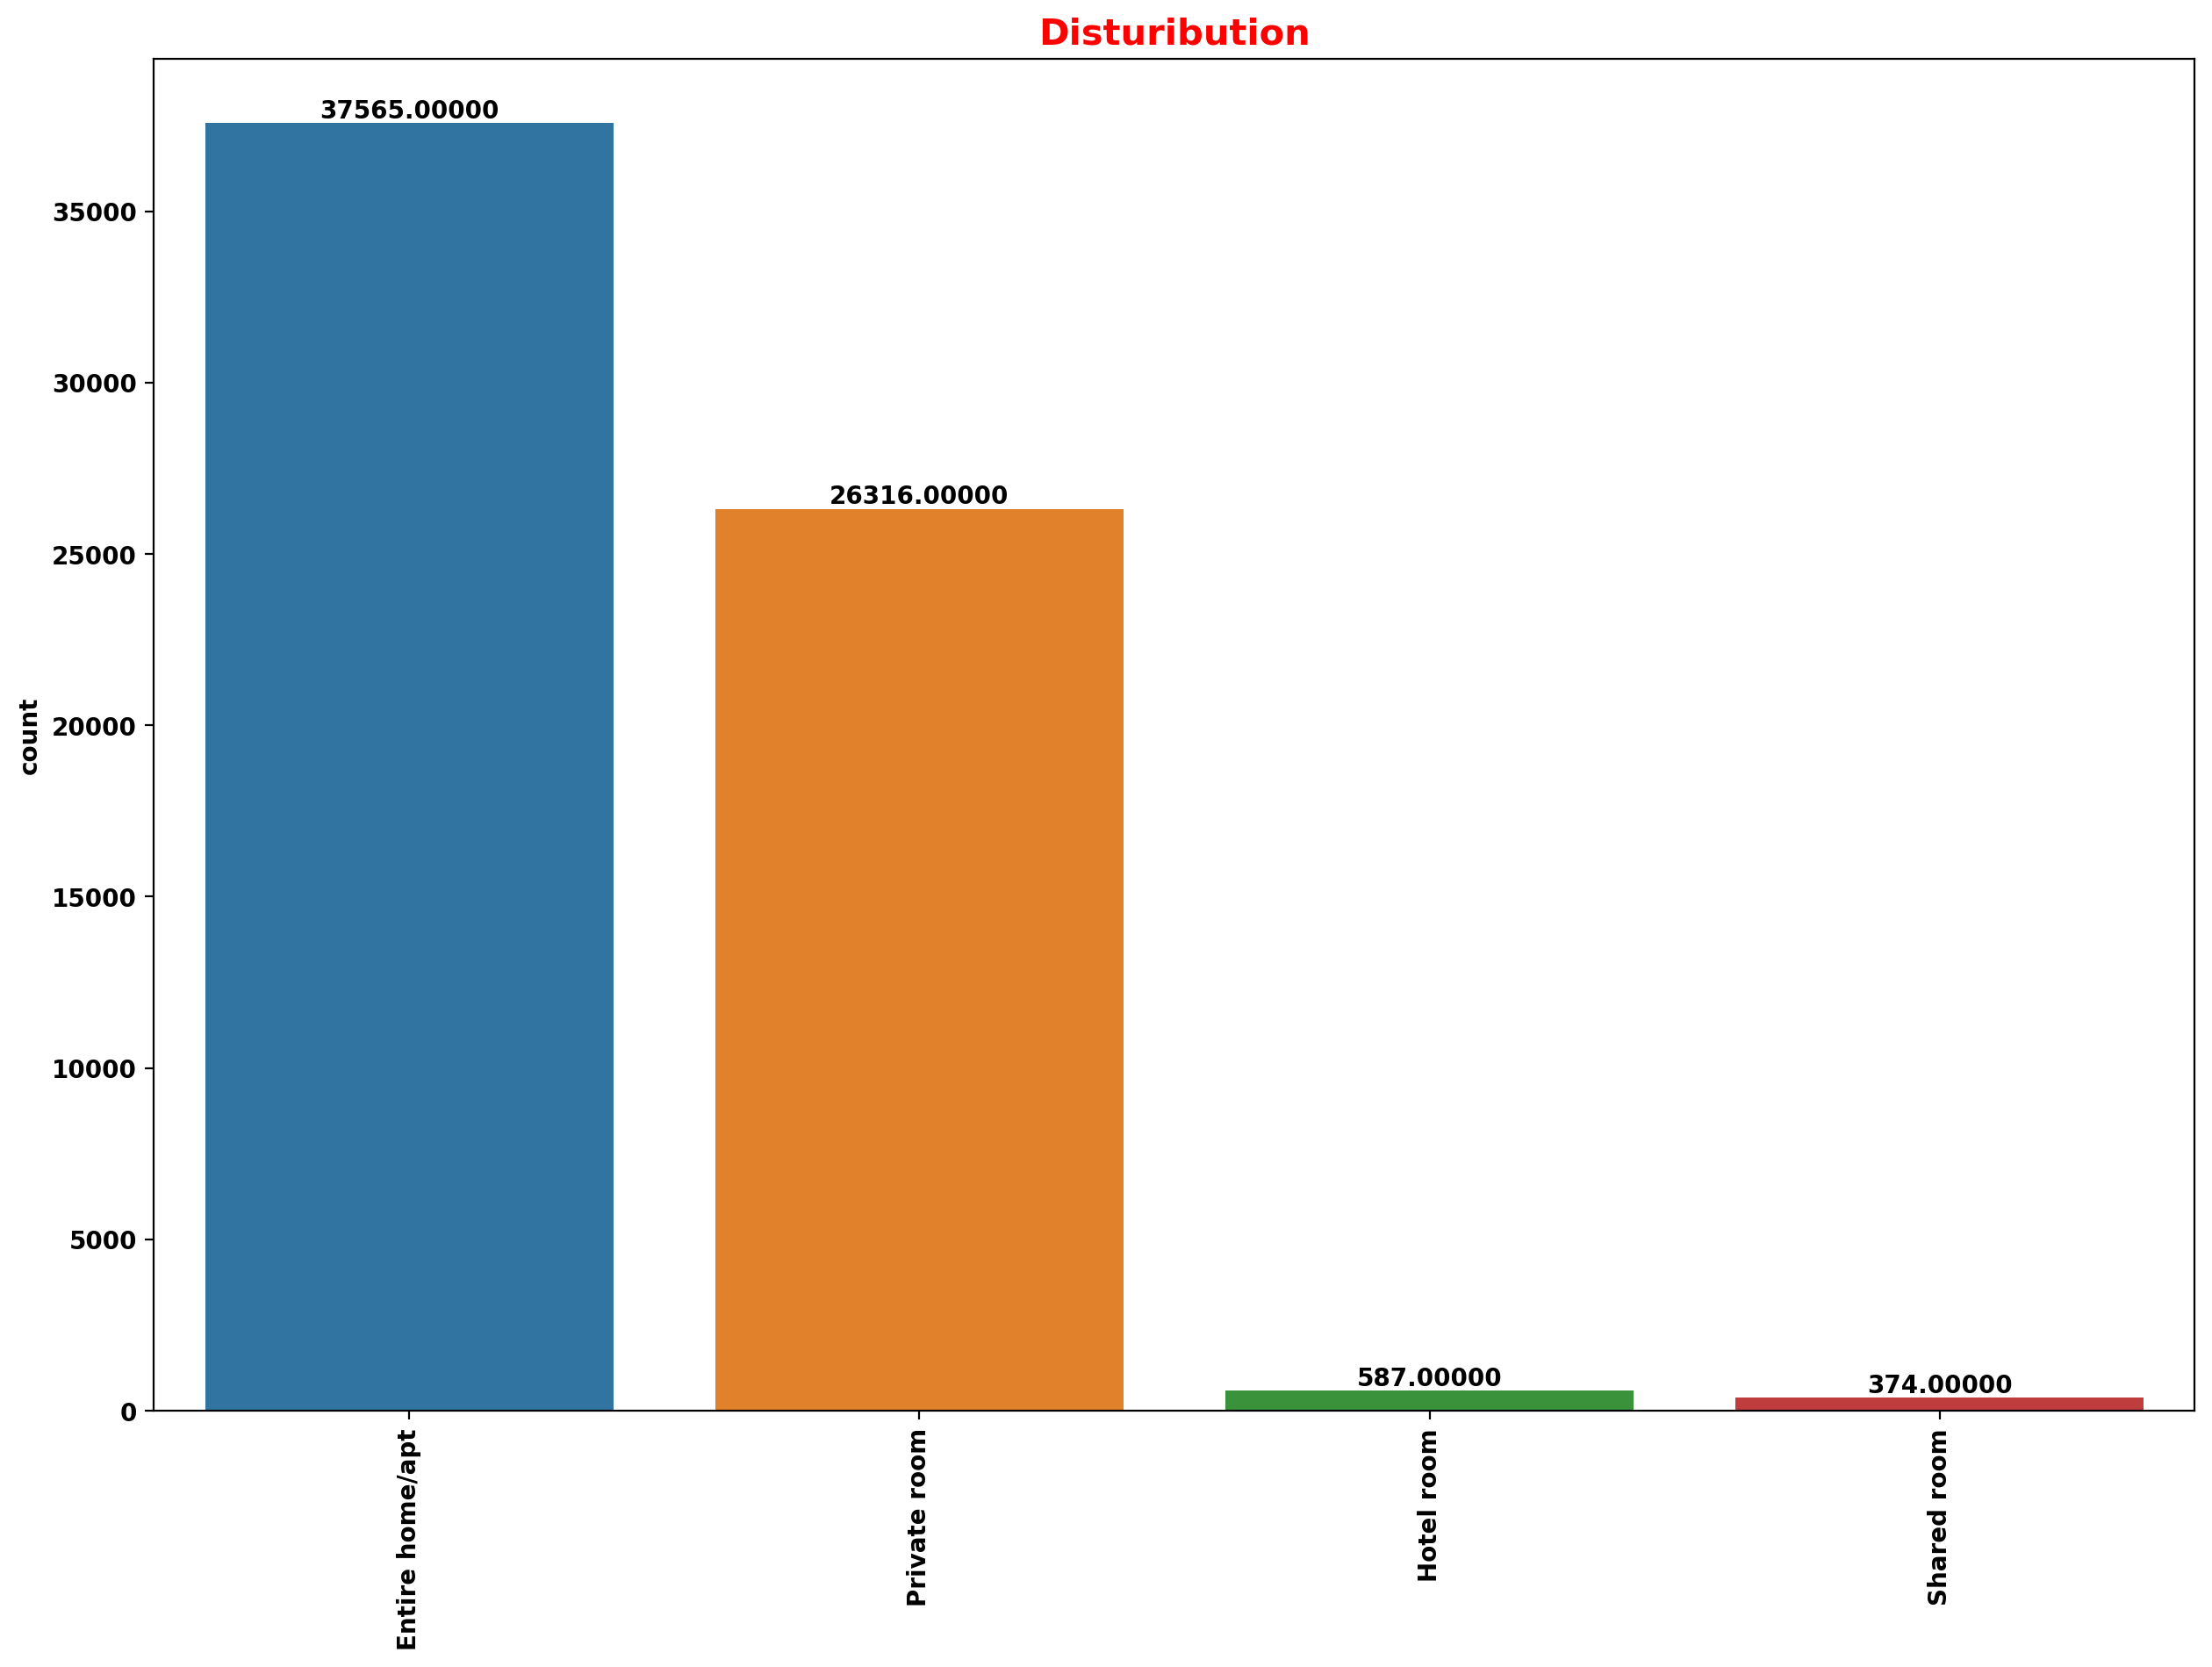

In [69]:
room_data=groups(listing,'room_type',['id','count'],1,1)
plotdata(room_data,'room_type','count')

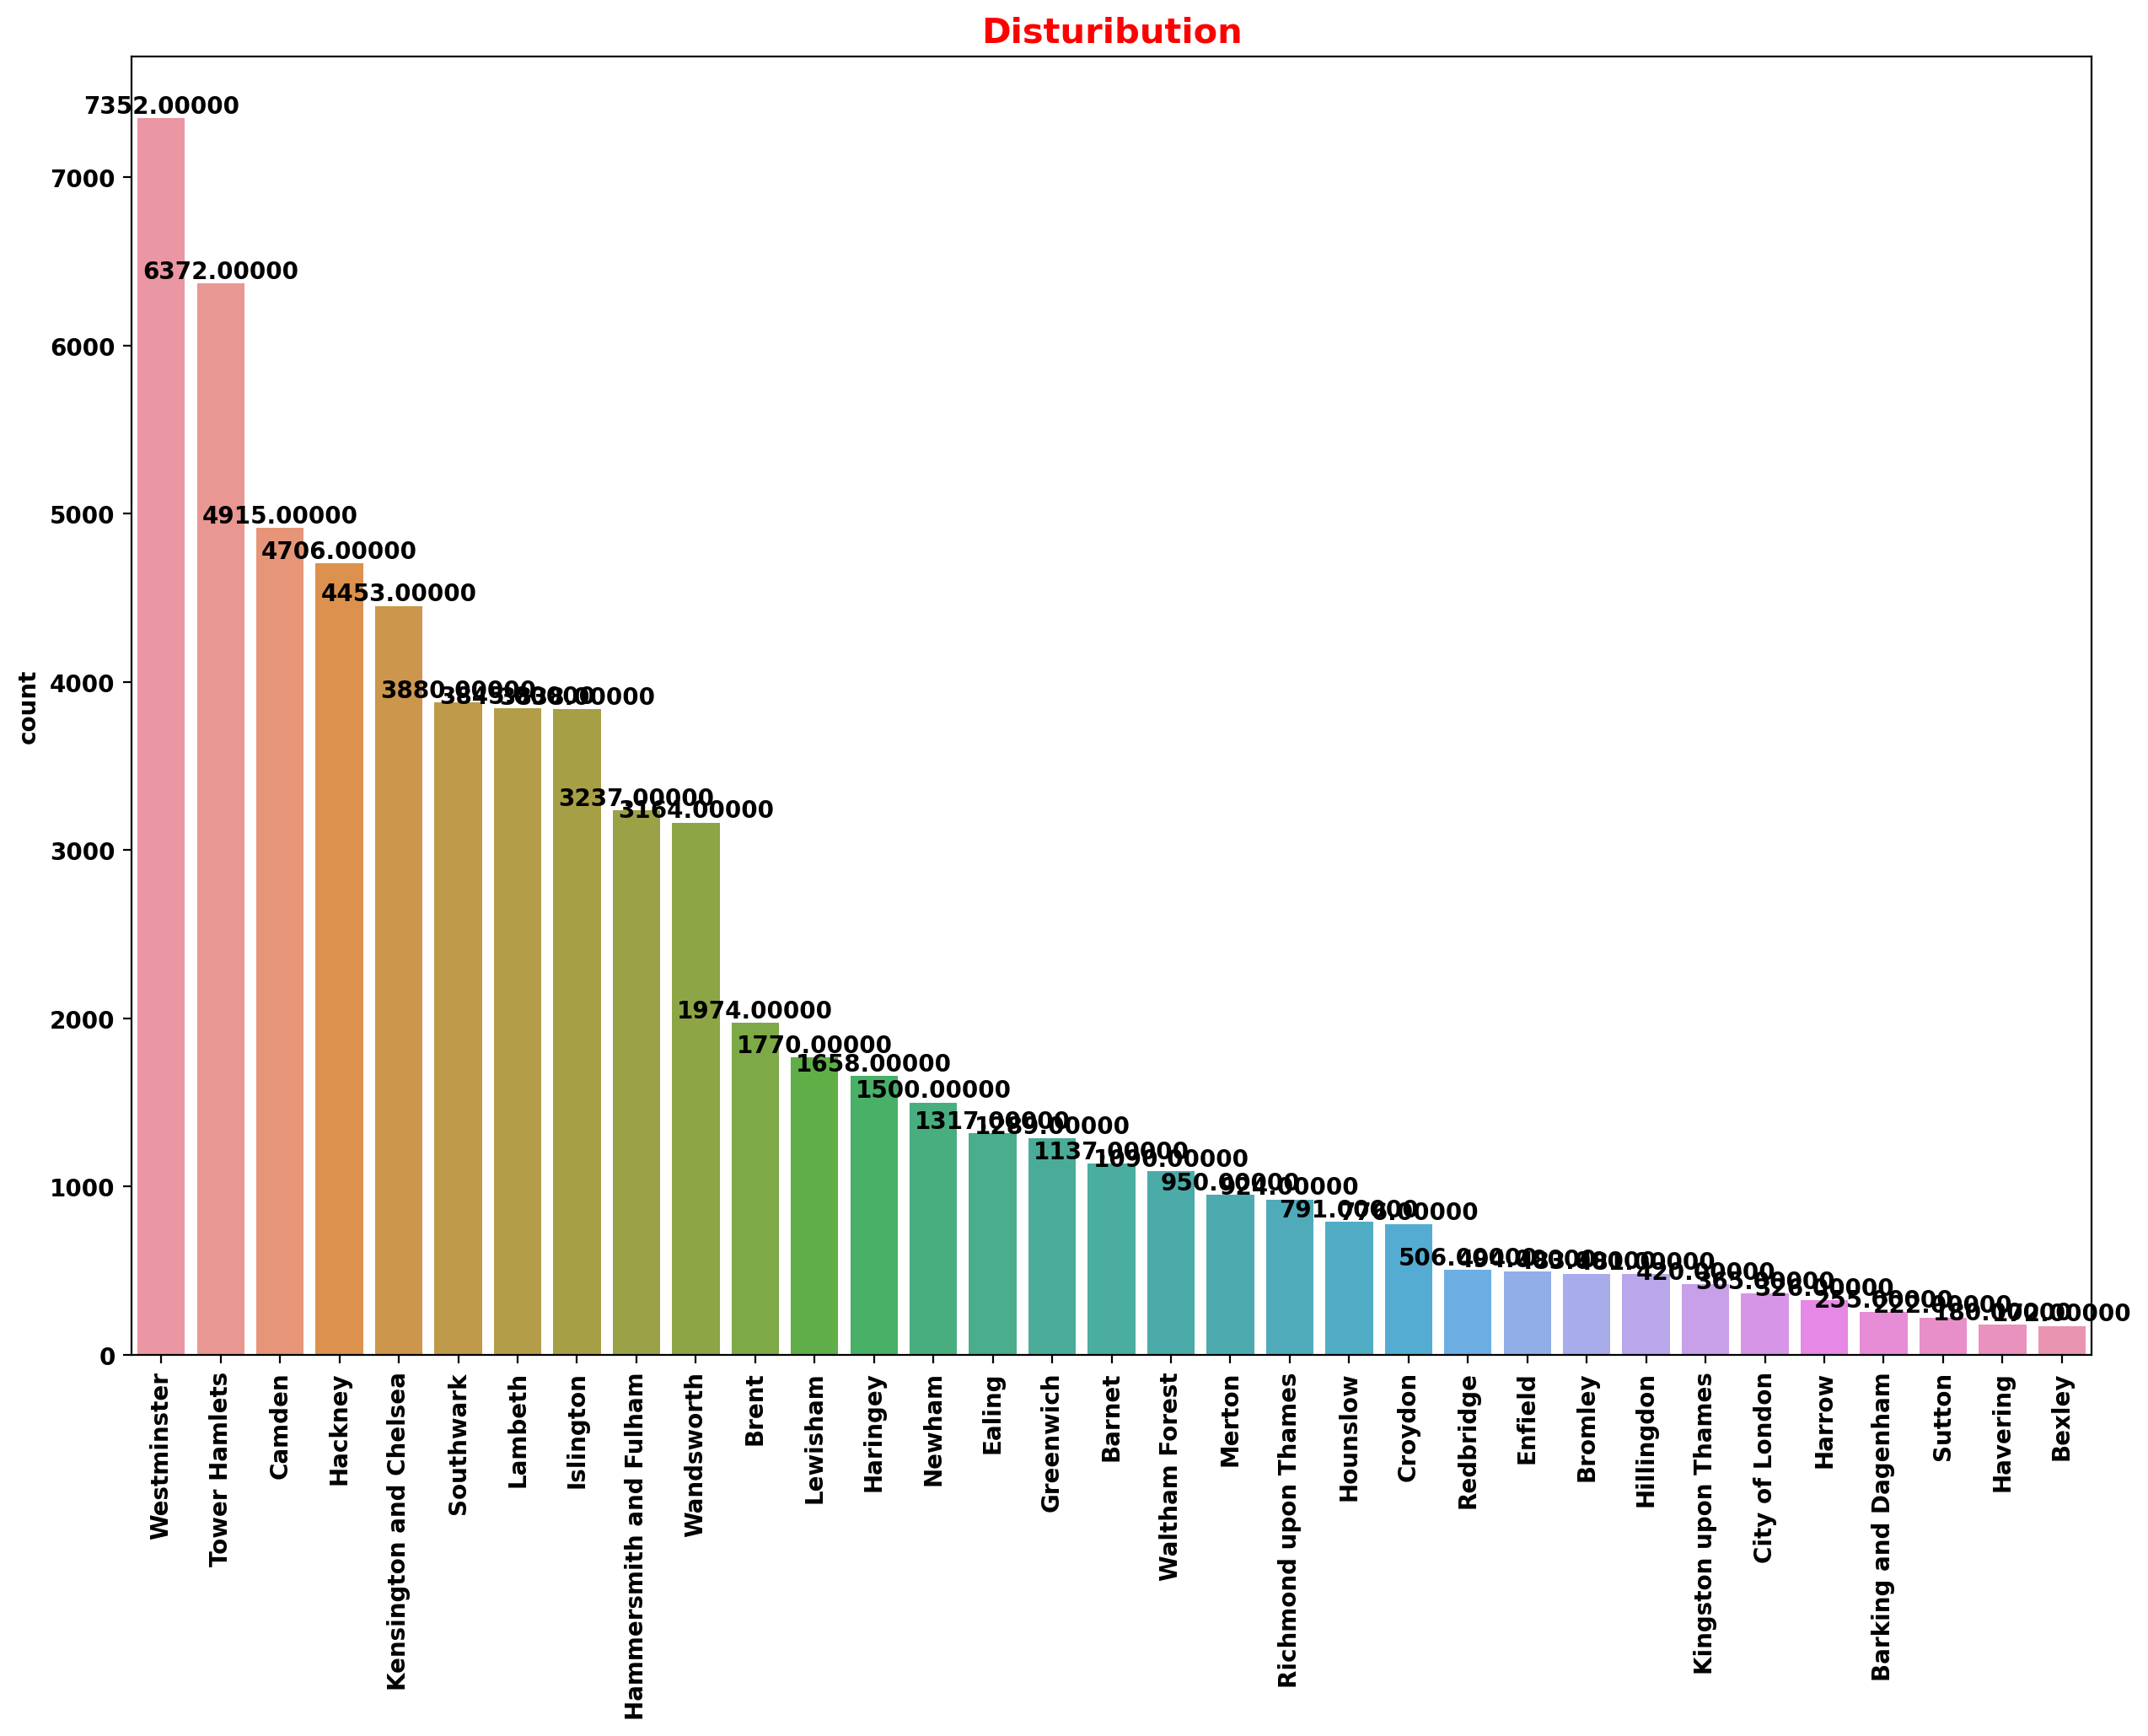

In [70]:
neighnourhood_data=groups(listing,'neighbourhood',['id','count'],1,1)
plotdata(neighnourhood_data,'neighbourhood','count')

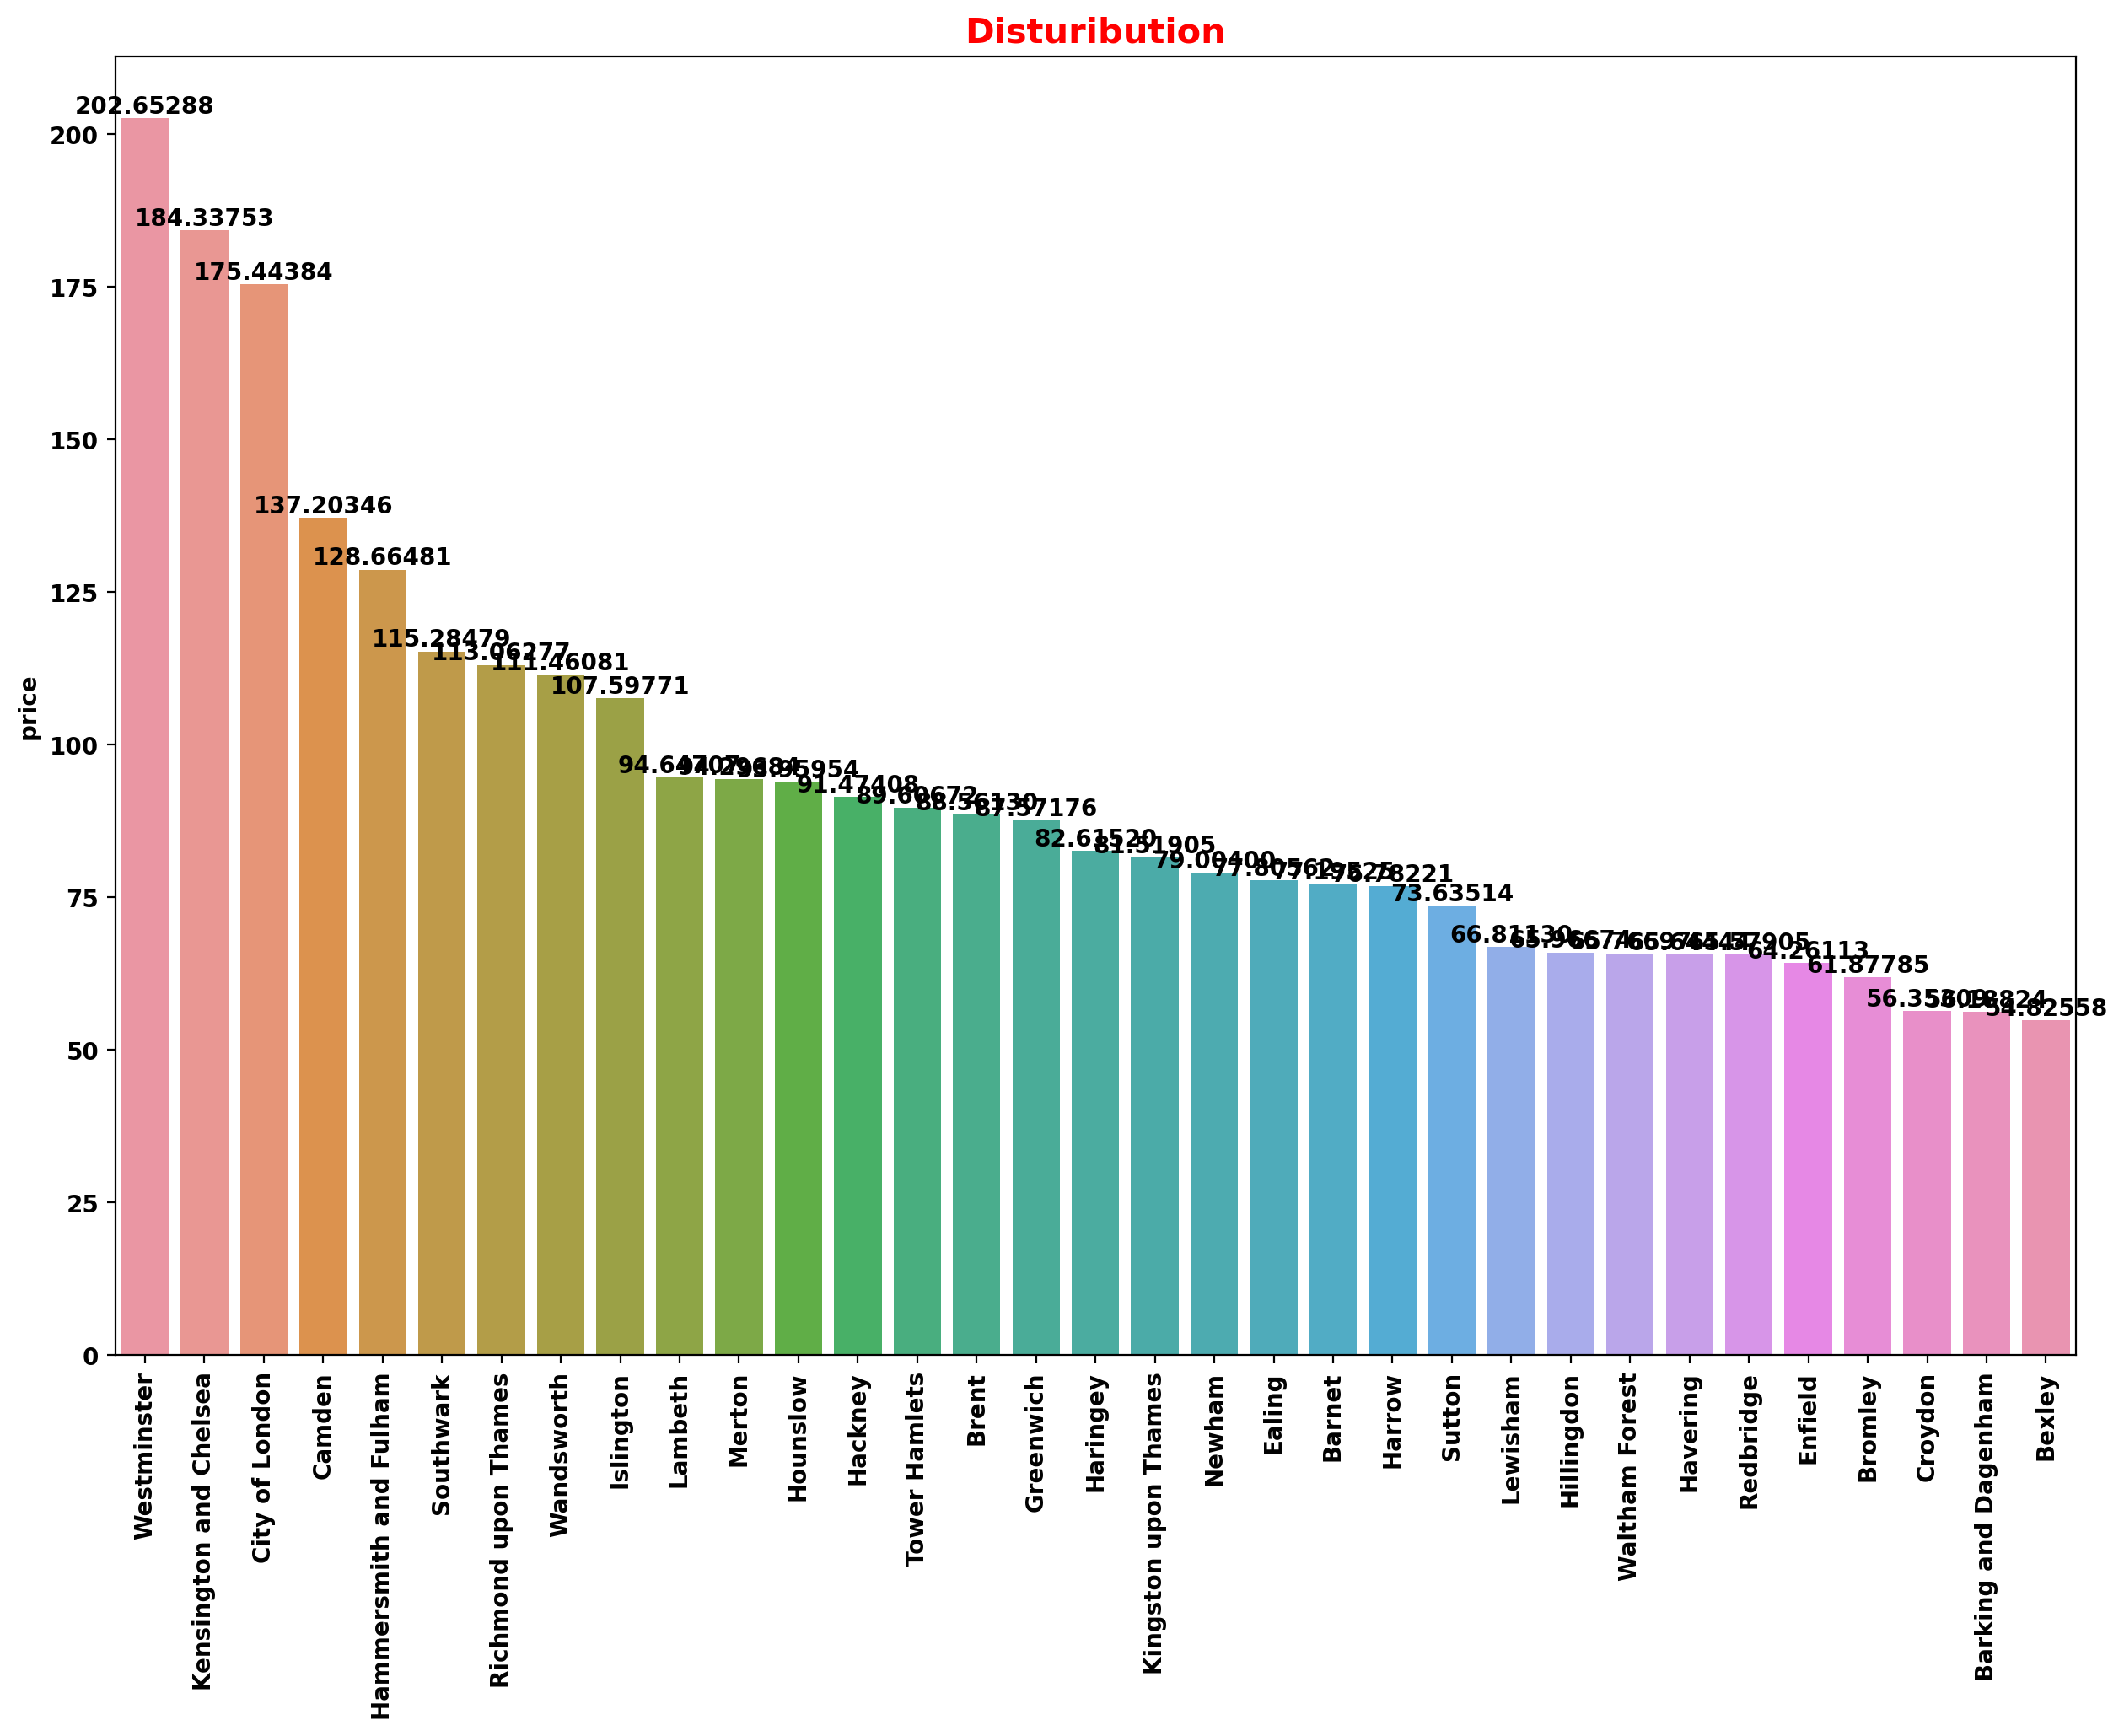

In [71]:
neigh_price = listing.groupby("neighbourhood").price.mean().sort_values(ascending=False)
neigh_price = neigh_price.reset_index()
plotdata(neigh_price,'neighbourhood','price')

In [72]:
neigh_review = listing.groupby("neighbourhood").number_of_reviews.sum().sort_values(ascending=False)
neigh_review = neigh_review.reset_index()
neigh_review

neighbourhood  number_of_reviews
0              Westminster             184094
1            Tower Hamlets             154988
2                   Camden             140347
3                  Lambeth             112999
4                Southwark             103721
5   Kensington and Chelsea             101941
6                Islington              94130
7                  Hackney              89914
8   Hammersmith and Fulham              78754
9               Wandsworth              63310
10                   Brent              48050
11                Haringey              35057
12                  Newham              33106
13                Lewisham              33094
14                  Ealing              31502
15               Greenwich              26295
16    Richmond upon Thames              23209
17                  Barnet              19853
18                Hounslow              19621
19          Waltham Forest              18684
20                  Merton              14733
21              Hillingdon              13721
22                 Croydon              12318
23          City of London               8987
24               Redbridge               8964
25    Kingston upon Thames               8206
26                 Bromley               7887
27                 Enfield               7818
28                  Harrow               6230
29                  Sutton               4784
30    Barking and Dagenham               3208
31                Havering               2438
32                  Bexley               2003

In [73]:
property_type_borough = listing.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")
property_type_borough
# property_type_borough['total']=property_type_borough['Entire home/apt']+property_type_borough['Private room']+property_type_borough['Shared room']+property_type_borough['Hotel room']

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                                 
Barking and Dagenham               78.0         3.0         172.0          2.0
Barnet                            498.0        26.0         607.0          6.0
Bexley                             53.0         2.0         114.0          3.0
Brent                             950.0        13.0         980.0         31.0
Bromley                           187.0        14.0         279.0          3.0
Camden                           3284.0        90.0        1517.0         24.0
City of London                    320.0         2.0          42.0          1.0
Croydon                           307.0        10.0         456.0          3.0
Ealing                            515.0        21.0         774.0          7.0
Enfield                           174.0        19.0         299.0          2.0
Greenwich                         665.0         6.0         612.0          6.0
Hackney                          2766.0         8.0        1914.0         18.0
Hammersmith and Fulham           2147.0        31.0        1047.0         12.0
Haringey                          772.0         2.0         873.0         11.0
Harrow                            121.0         NaN         205.0          NaN
Havering                           75.0         NaN         104.0          1.0
Hillingdon                        164.0         5.0         310.0          2.0
Hounslow                          370.0         3.0         417.0          1.0
Islington                        2474.0        26.0        1328.0         10.0
Kensington and Chelsea           3600.0       130.0         696.0         27.0
Kingston upon Thames              181.0         NaN         237.0          2.0
Lambeth                          2040.0         8.0        1769.0         28.0
Lewisham                          774.0         NaN         972.0         24.0
Merton                            425.0         1.0         514.0         10.0
Newham                            612.0         6.0         864.0         18.0
Redbridge                         175.0         NaN         328.0          3.0
Richmond upon Thames              505.0         5.0         411.0          3.0
Southwark                        2172.0         8.0        1668.0         32.0
Sutton                             75.0         NaN         146.0          1.0
Tower Hamlets                    3254.0        27.0        3066.0         25.0
Waltham Forest                    529.0         5.0         548.0          8.0
Wandsworth                       1783.0        32.0        1343.0          6.0
Westminster                      5520.0        84.0        1704.0         44.0

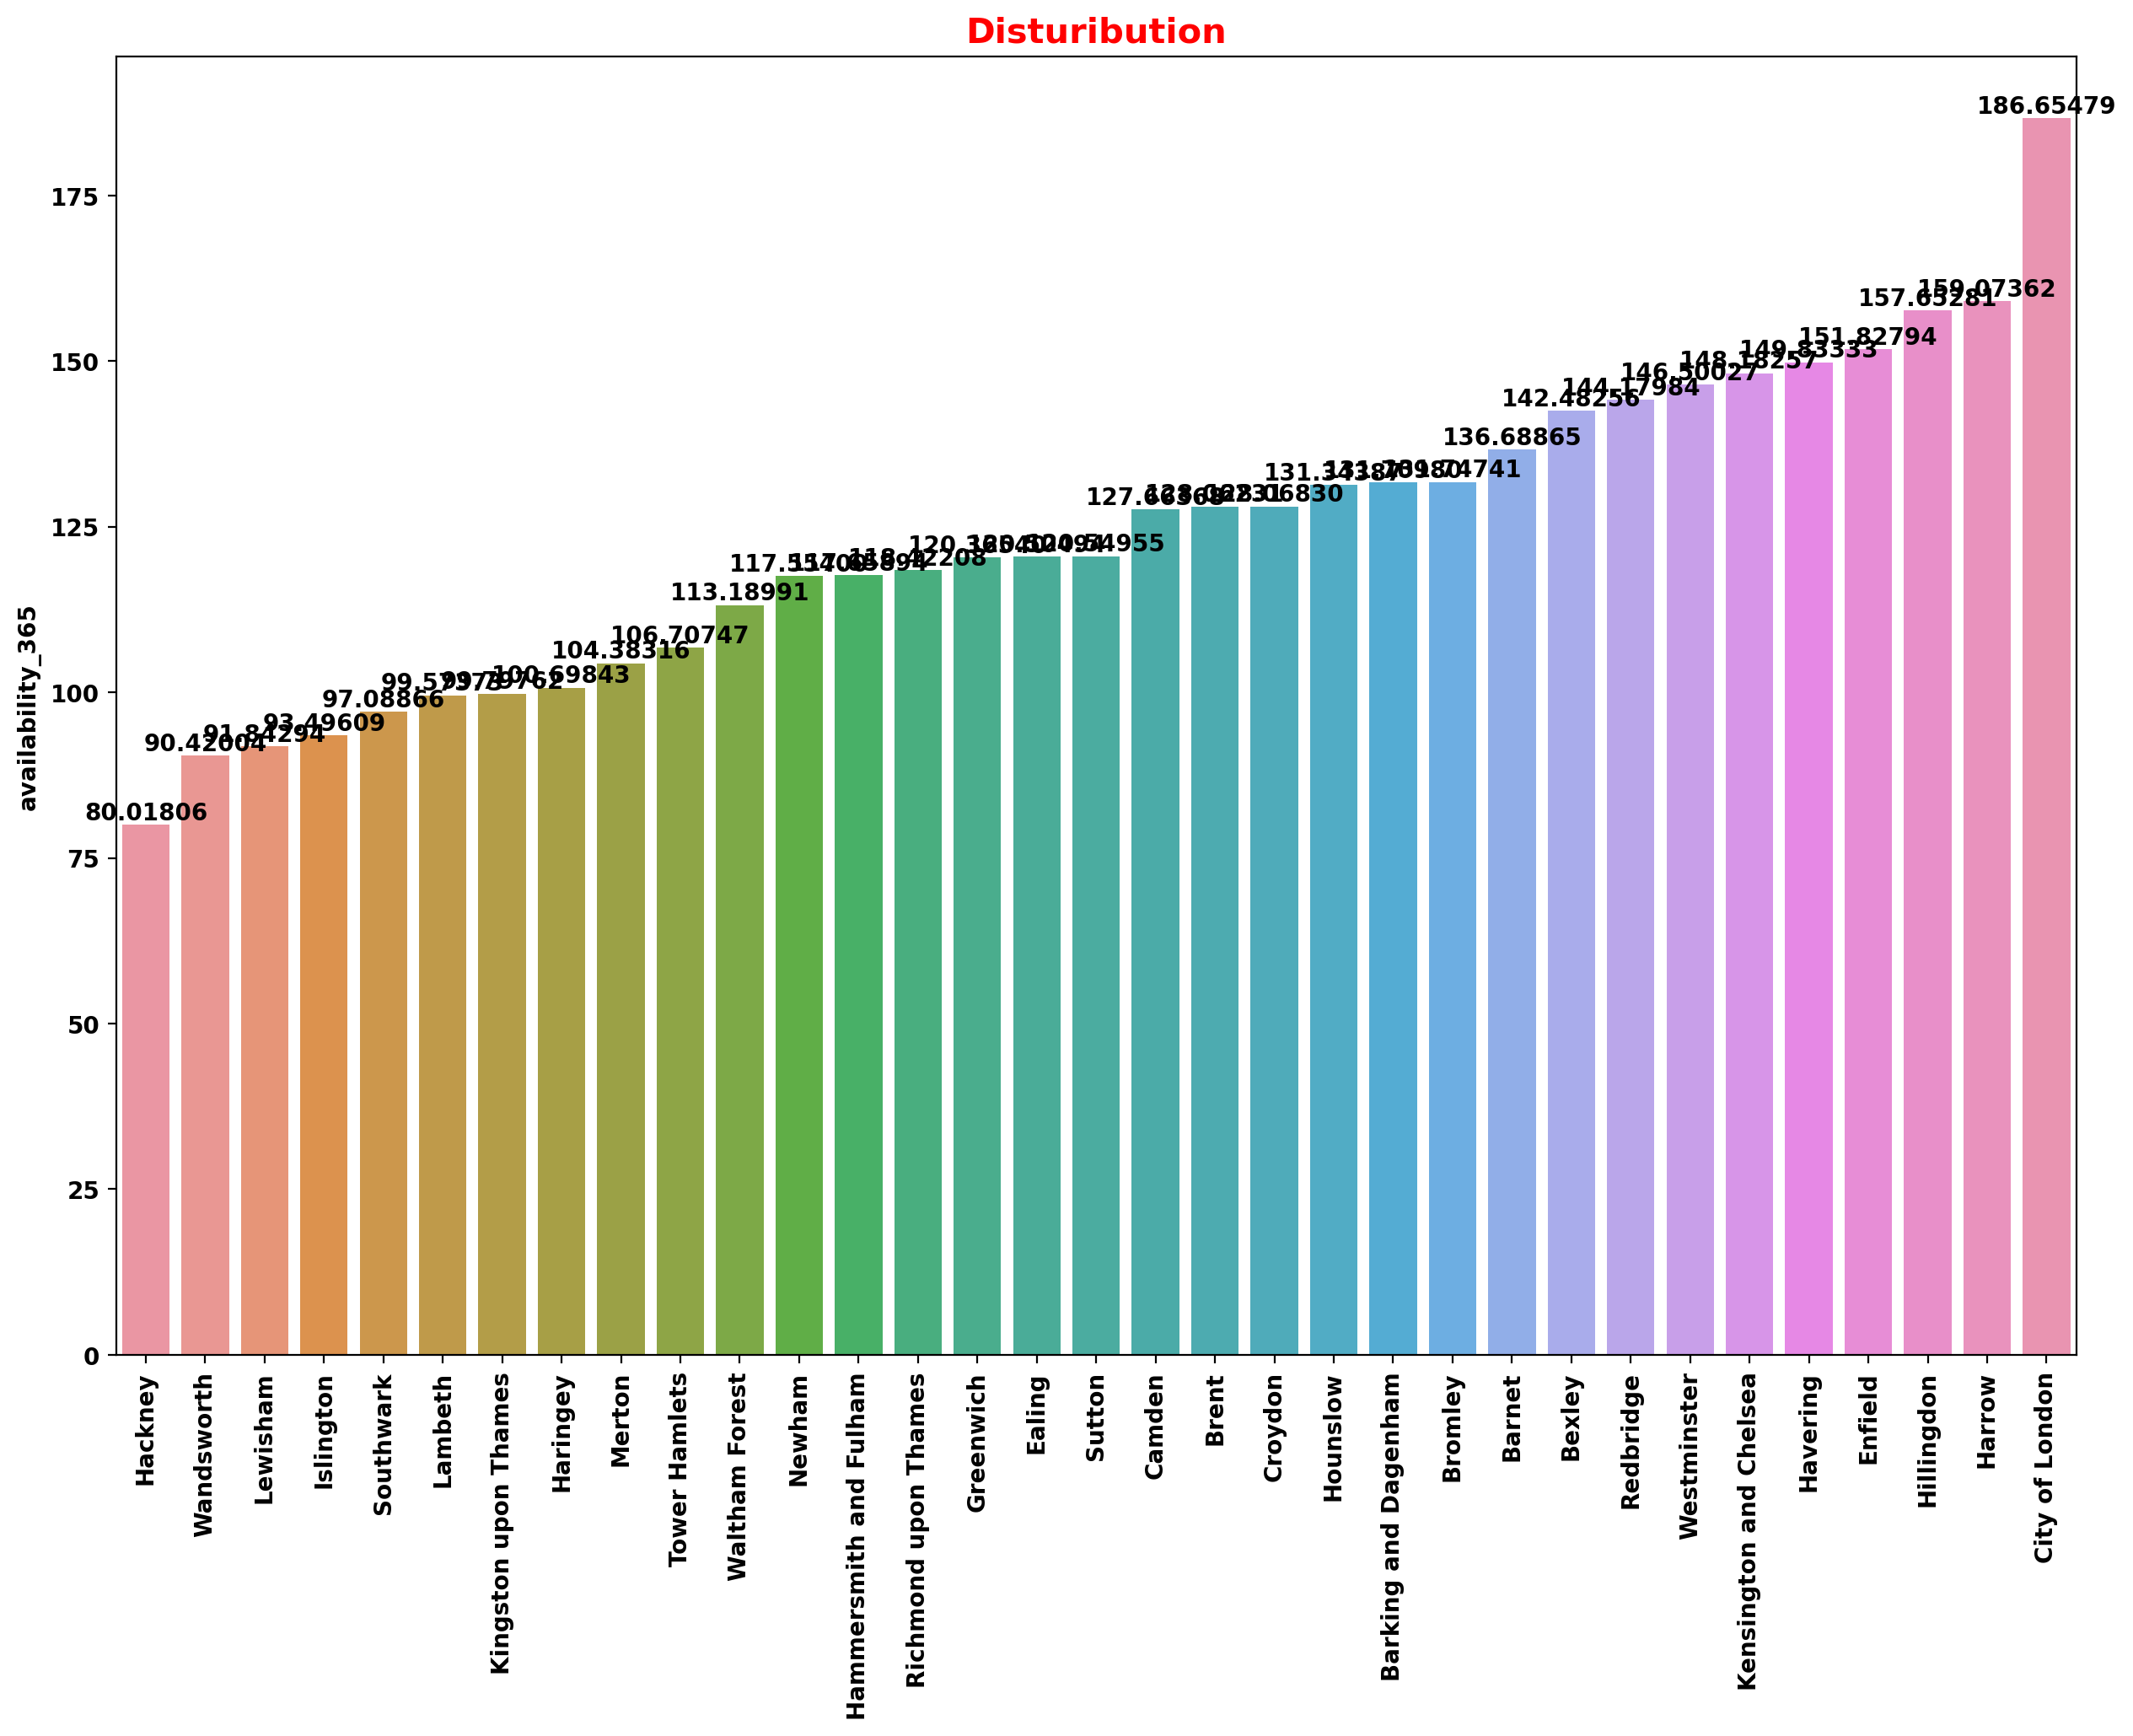

In [74]:
occupancy_borough = listing.groupby("neighbourhood").availability_365.mean().sort_values().reset_index()

plotdata(occupancy_borough,"neighbourhood",'availability_365')

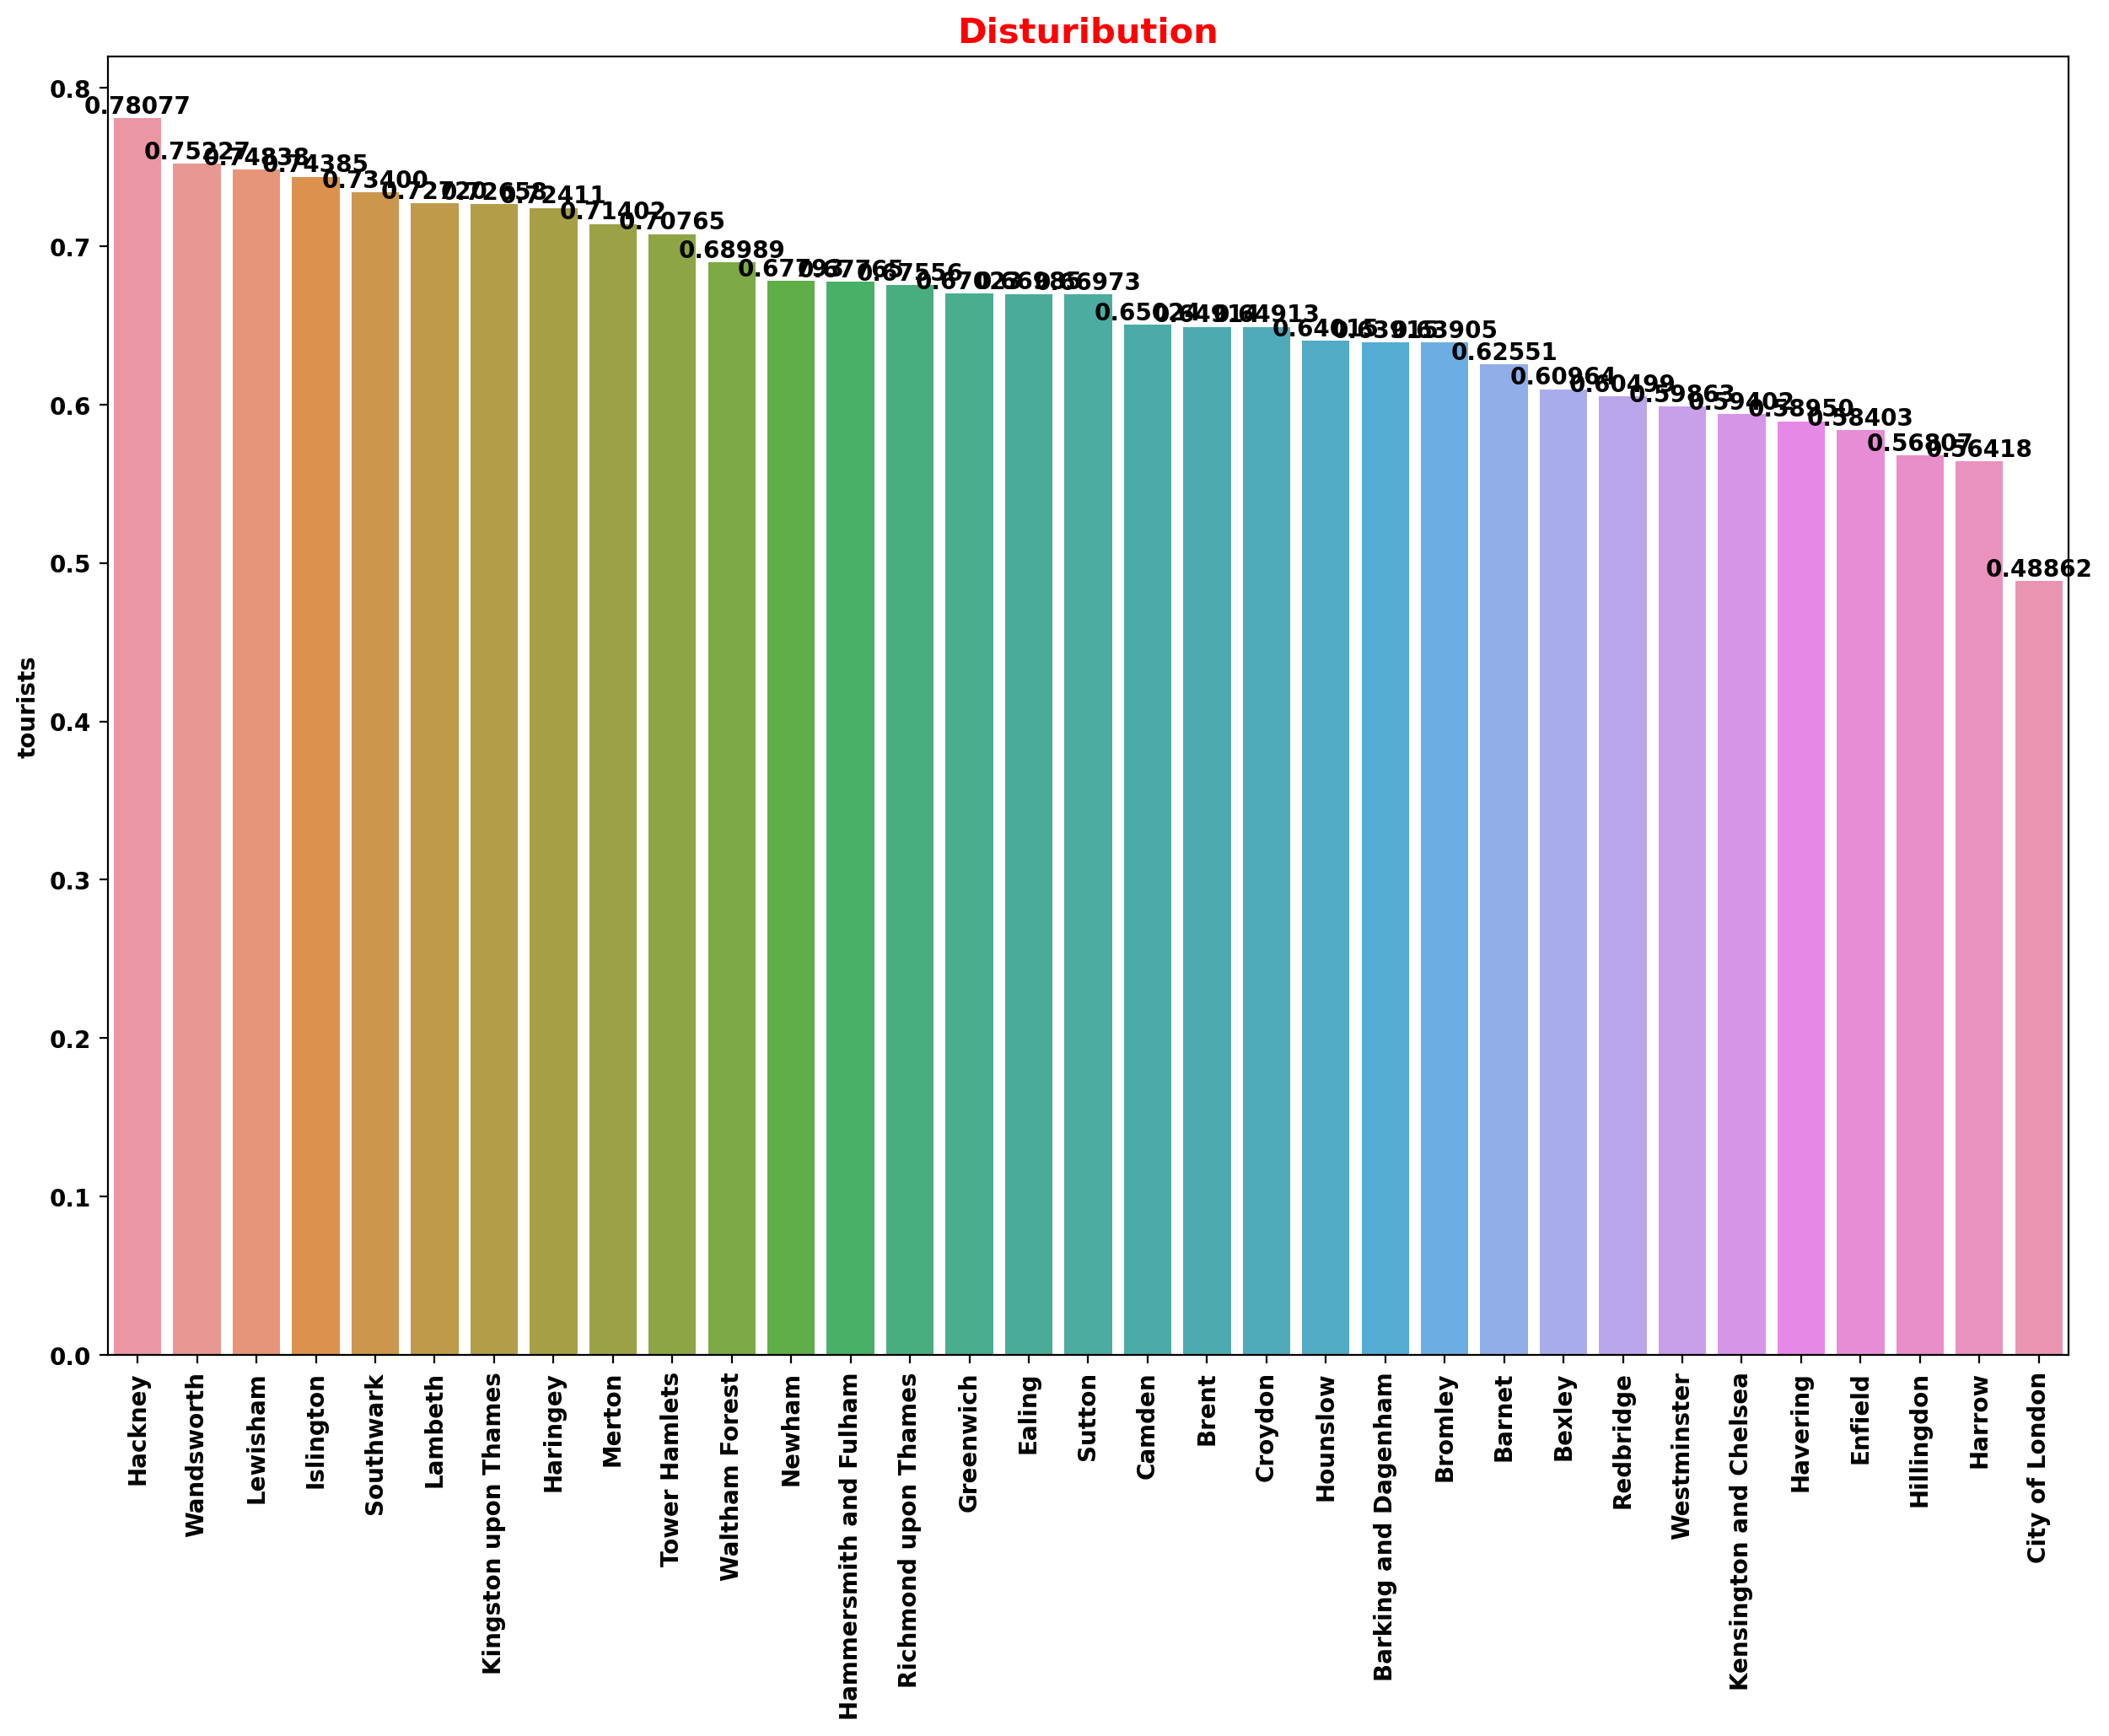

In [75]:
occupancy_borough['tourists']=1-occupancy_borough.availability_365/365
plotdata(occupancy_borough,"neighbourhood",'tourists')

In [76]:
red_df=listing.groupby("neighbourhood").mean()
red_df = red_df[["price","minimum_nights","reviews_per_month"]].reset_index()
red_df['est_night/year']=365-occupancy_borough['availability_365']
red_df['annual income']=red_df['price']*red_df['est_night/year']
red_df

neighbourhood       price  minimum_nights  reviews_per_month  \
0     Barking and Dagenham   56.188235        3.356863           0.815333   
1                   Barnet   77.195251        5.461741           0.783509   
2                   Bexley   54.825581        2.965116           0.687674   
3                    Brent   88.561297        3.804965           0.980588   
4                  Bromley   61.877847        3.689441           0.734265   
5                   Camden  137.203459        4.209766           1.225736   
6           City of London  175.443836        5.076712           1.085699   
7                  Croydon   56.353093        4.503866           0.815528   
8                   Ealing   77.805619        3.675019           0.853052   
9                  Enfield   64.261134        2.977733           0.718583   
10               Greenwich   87.571761        3.271528           0.929092   
11                 Hackney   91.474076        4.400340           0.687380   
12  Hammersmith and Fulham  128.664813        3.396046           0.925697   
13                Haringey   82.615199        4.445718           0.820766   
14                  Harrow   76.782209        4.368098           0.772331   
15                Havering   65.644444        2.472222           0.794111   
16              Hillingdon   65.966736        8.214137           1.280166   
17                Hounslow   93.959545        3.379267           1.075601   
18               Islington  107.597707        3.593538           0.933580   
19  Kensington and Chelsea  184.337525        4.450483           0.935812   
20    Kingston upon Thames   81.519048        3.433333           0.887381   
21                 Lambeth   94.647074        3.479324           1.031477   
22                Lewisham   66.811299        3.613559           0.750017   
23                  Merton   94.296842        4.124211           0.655958   
24                  Newham   79.004000        4.306000           1.008840   
25               Redbridge   65.579051        3.292490           0.809822   
26    Richmond upon Thames  113.062771        4.251082           0.889351   
27               Southwark  115.284794        3.495619           1.052938   
28                  Sutton   73.635135        3.373874           0.875901   
29           Tower Hamlets   89.606717        4.490741           1.073308   
30          Waltham Forest   65.766972        3.127523           0.754229   
31              Wandsworth  111.460809        3.857143           0.801068   
32             Westminster  202.652884        4.545702           1.156714   

    est_night/year  annual income  
0       284.981938   16012.632184  
1       274.579962   21196.268998  
2       273.157062   14975.994744  
3       271.503908   24044.738220  
4       267.911340   16577.776863  
5       265.426268   36417.402009  
6       265.202381   46528.122929  
7       264.301568   14894.210793  
8       260.616842   20277.454678  
9       258.292530   16598.170767  
10      251.810092   22051.453185  
11      247.446000   22634.894123  
12      247.341057   31824.090811  
13      246.577922   20371.084110  
14      244.634600   18783.584921  
15      244.495065   16049.742681  
16      244.450450   16125.598322  
17      237.336317   22300.012366  
18      236.937690   25493.952176  
19      236.931701   43675.403425  
20      233.656131   19047.425309  
21      233.290196   22080.234480  
22      233.252588   15583.908500  
23      228.311346   21529.038911  
24      222.517442   17579.767977  
25      220.820158   14481.176495  
26      218.499728   24704.184611  
27      216.817426   24995.752304  
28      215.166667   15843.826577  
29      213.172065   19101.648857  
30      207.347193   13636.597158  
31      205.926380   22952.720971  
32      178.345205   36142.170161

In [77]:
listing.describe()

id       host_id      latitude     longitude         price  \
count  6.484200e+04  6.484200e+04  64842.000000  64842.000000  64842.000000   
mean   2.379903e+07  8.686224e+07     51.509761     -0.128158    115.930092   
std    1.189096e+07  9.057742e+07      0.045444      0.091707    241.596545   
min    1.391300e+04  4.775000e+03     51.294790     -0.494850      0.000000   
25%    1.479521e+07  1.433389e+07     51.485850     -0.187730     45.000000   
50%    2.413315e+07  4.687934e+07     51.514080     -0.125155     80.000000   
75%    3.436871e+07  1.425708e+08     51.536950     -0.070340    130.000000   
max    4.311927e+07  3.432172e+08     51.681690      0.268950  19985.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    64842.000000       64842.000000       64842.000000   
mean         4.067703          23.348540           0.963183   
std         18.474259          41.550896           1.177591   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.200000   
50%          2.000000           9.000000           0.560000   
75%          3.000000          25.000000           1.270000   
max       1124.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    64842.000000      64842.000000  
mean                        15.249314        116.137025  
std                         75.150897        133.053772  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          2.000000         66.000000  
75%                          5.000000        235.000000  
max                        928.000000        365.000000

In [78]:
listing1=listing[listing['price']>=35]
listing1=listing1[listing1['price']<=150]
listing1.describe()

id       host_id      latitude     longitude         price  \
count  4.501600e+04  4.501600e+04  45016.000000  45016.000000  45016.000000   
mean   2.354030e+07  8.445312e+07     51.510125     -0.128088     81.751089   
std    1.196567e+07  9.003090e+07      0.045007      0.089501     33.459245   
min    1.391300e+04  4.775000e+03     51.294790     -0.487860     35.000000   
25%    1.441181e+07  1.355734e+07     51.485040     -0.188352     50.000000   
50%    2.377900e+07  4.411127e+07     51.514715     -0.121720     79.000000   
75%    3.424139e+07  1.374599e+08     51.538030     -0.070207    105.000000   
max    4.311596e+07  3.432172e+08     51.681690      0.268950    150.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    45016.000000       45016.000000       45016.000000   
mean         4.002688          24.309223           0.979754   
std         19.007917          43.578902           1.193876   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.200000   
50%          2.000000           9.000000           0.570000   
75%          3.000000          26.000000           1.300000   
max       1124.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    45016.000000      45016.000000  
mean                         8.411920        107.727208  
std                         28.700605        129.724669  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         48.000000  
75%                          3.000000        196.000000  
max                        928.000000        365.000000

<Figure size 3000x2000 with 0 Axes>

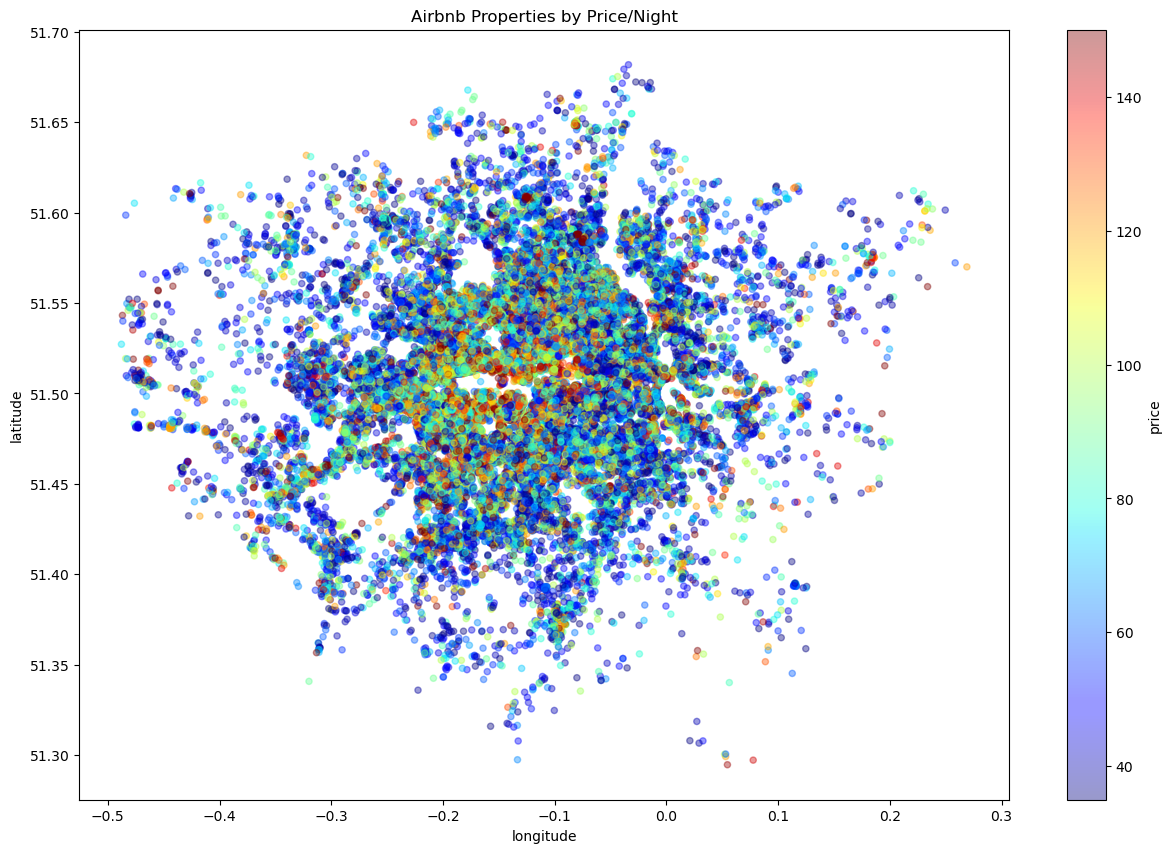

In [79]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")
plt.show()

<Figure size 3000x2000 with 0 Axes>

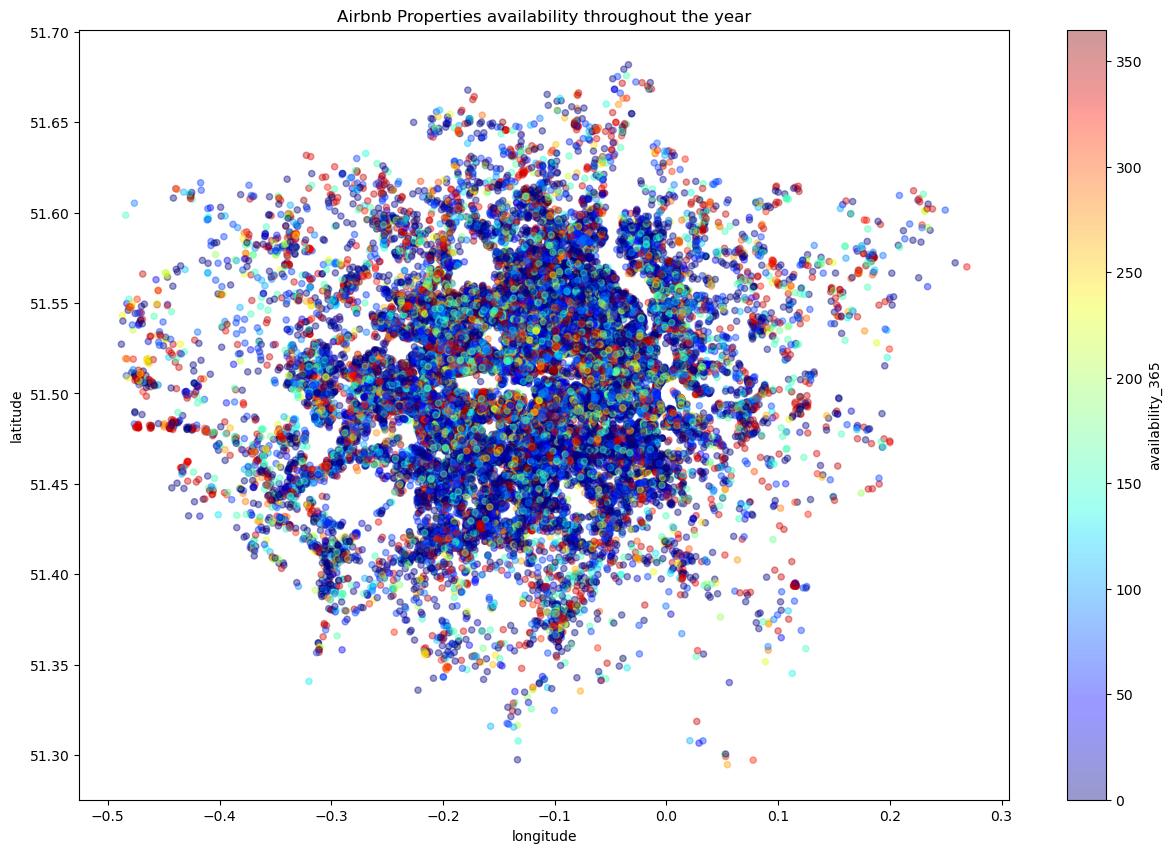

In [111]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='availability_365', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties availability throughout the year")
plt.show()

In [81]:
listing1['annual_income']=listing1['price']*(365-listing1['availability_365'])

<Figure size 3000x2000 with 0 Axes>

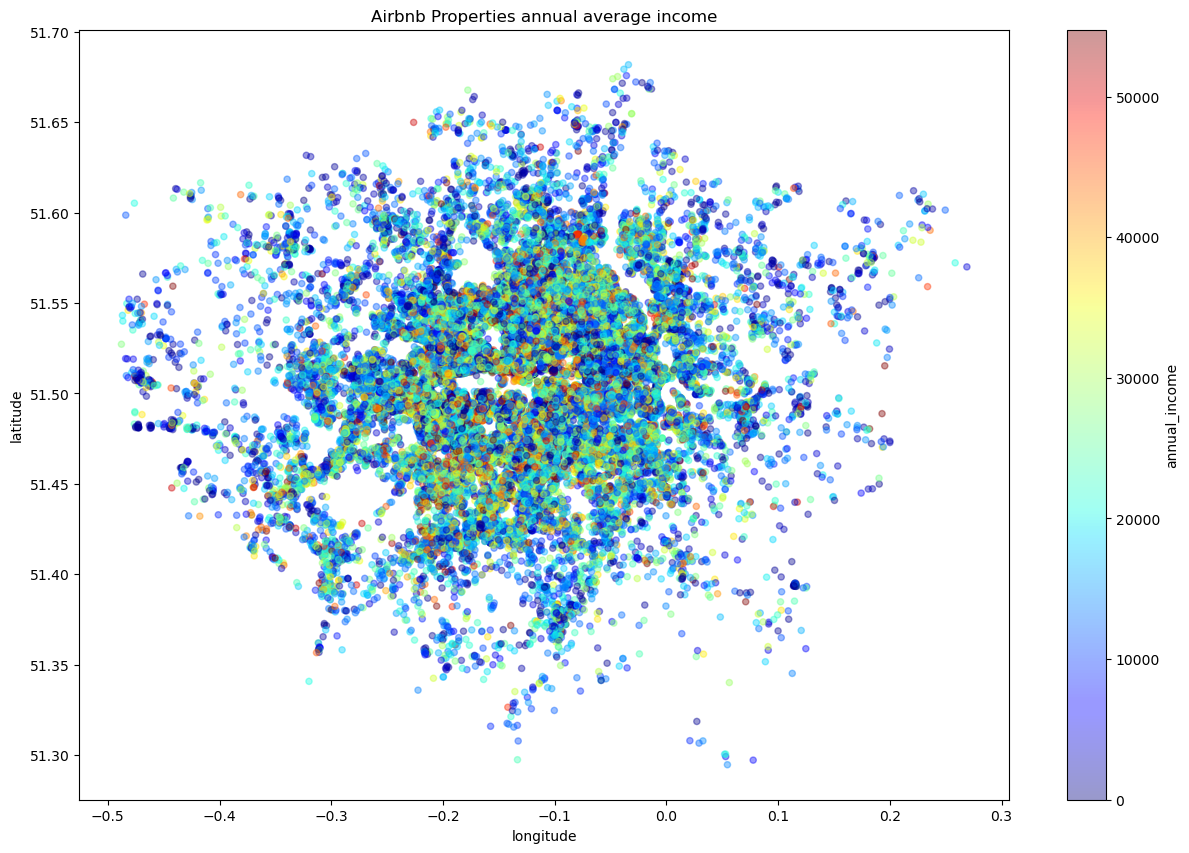

In [112]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=listing1.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties annual average income")
plt.show()

In [83]:
# red_df=listing.groupby("neighbourhood").mean()
# red_df = red_df[["price","minimum_nights","reviews_per_month"]].reset_index()
inc=listing1.groupby('neighbourhood').sum().reset_index()
mark=listing1.groupby('neighbourhood').mean().reset_index()
inc['longitude']=mark['longitude']
inc['latitude']=mark['latitude']
# print(inc[['latitude','longitude','neighbourhood','annual_income']])
# inc[['latitude','longitude','neighbourhood','annual_income']].to_csv('Pred.csv')
inc.head()

neighbourhood           id       host_id   latitude  longitude  \
0  Barking and Dagenham   4321746097   22135243493  51.542645   0.112094   
1                Barnet  20245419007   80635020272  51.596730  -0.206281   
2                Bexley   2424585826   11660568302  51.471405   0.137298   
3                 Brent  32524346995  115969490202  51.545745  -0.233753   
4               Bromley   7337288425   30675427431  51.401224   0.003821   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0   9676             471               1700             118.77   
1  55664            4934              12943             603.27   
2   6309             256                865              56.86   
3  96688            3979              34388            1378.47   
4  20451            1233               4082             203.15   

   calculated_host_listings_count  availability_365  annual_income  
0                             293             20513        2152857  
1                            8281            106731       12896719  
2                             270             14121        1231956  
3                           13729            166872       23840282  
4                             707             38837        4777329

<Figure size 3000x2000 with 0 Axes>

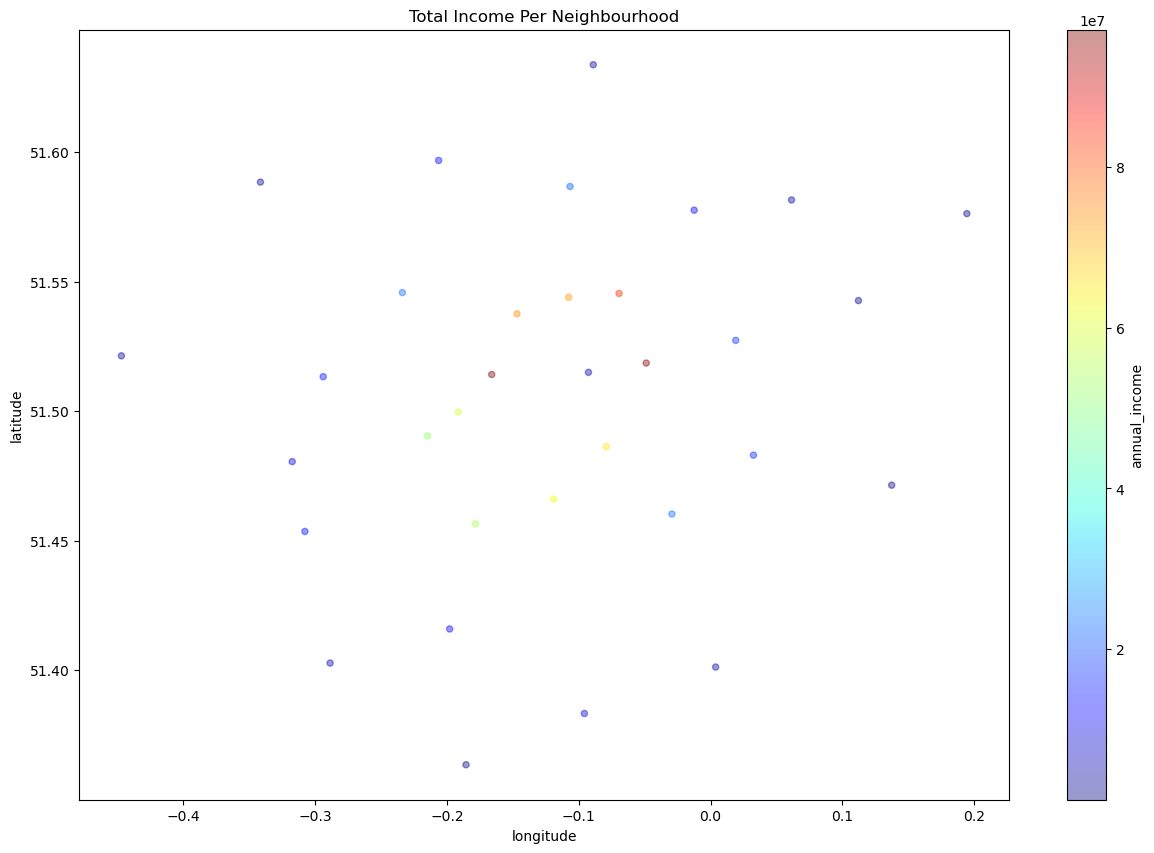

In [113]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=inc.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Total Income Per Neighbourhood")
plt.show()

In [85]:
property_type_borough = listing1.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("neighbourhood","room_type","id")

In [86]:
import numpy as np
property_type_borough=property_type_borough.replace(np.nan,0)
property_type_borough
property_type_borough['total']=property_type_borough['Entire home/apt']+property_type_borough['Private room']+property_type_borough['Shared room']+property_type_borough['Hotel room']

In [87]:
property_type_borough['total']=property_type_borough['total'].astype('float64')


In [88]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   33 non-null     object 
 1   id                              33 non-null     int64  
 2   host_id                         33 non-null     int64  
 3   latitude                        33 non-null     float64
 4   longitude                       33 non-null     float64
 5   price                           33 non-null     int64  
 6   minimum_nights                  33 non-null     int64  
 7   number_of_reviews               33 non-null     int64  
 8   reviews_per_month               33 non-null     float64
 9   calculated_host_listings_count  33 non-null     int64  
 10  availability_365                33 non-null     int64  
 11  annual_income                   33 non-null     int64  
dtypes: float64(3), int64(8), object(1)
mem

In [89]:
property_type_borough.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entire home/apt  33 non-null     float64
 1   Hotel room       33 non-null     float64
 2   Private room     33 non-null     float64
 3   Shared room      33 non-null     float64
 4   total            33 non-null     float64
dtypes: float64(5)
memory usage: 1.5+ KB


In [90]:
inc.reset_index()
inc['total']=property_type_borough['total']

In [91]:
inc[['latitude','longitude','neighbourhood','annual_income']].to_csv('Pred.csv')
property_type_borough.to_csv('rooms.csv')

In [92]:
pred=pd.read_csv('pred.csv')
rooms=pd.read_csv('rooms.csv')

In [93]:
pred['total']=rooms['total']

In [94]:
pred.head()

Unnamed: 0   latitude  longitude         neighbourhood  annual_income  \
0           0  51.542645   0.112094  Barking and Dagenham        2152857   
1           1  51.596730  -0.206281                Barnet       12896719   
2           2  51.471405   0.137298                Bexley        1231956   
3           3  51.545745  -0.233753                 Brent       23840282   
4           4  51.401224   0.003821               Bromley        4777329   

    total  
0   149.0  
1   802.0  
2    93.0  
3  1353.0  
4   297.0

In [95]:
pred['annual_income']=pred['annual_income']/pred['total']

In [96]:
pred.to_csv('pred1.csv')

<Figure size 3000x2000 with 0 Axes>

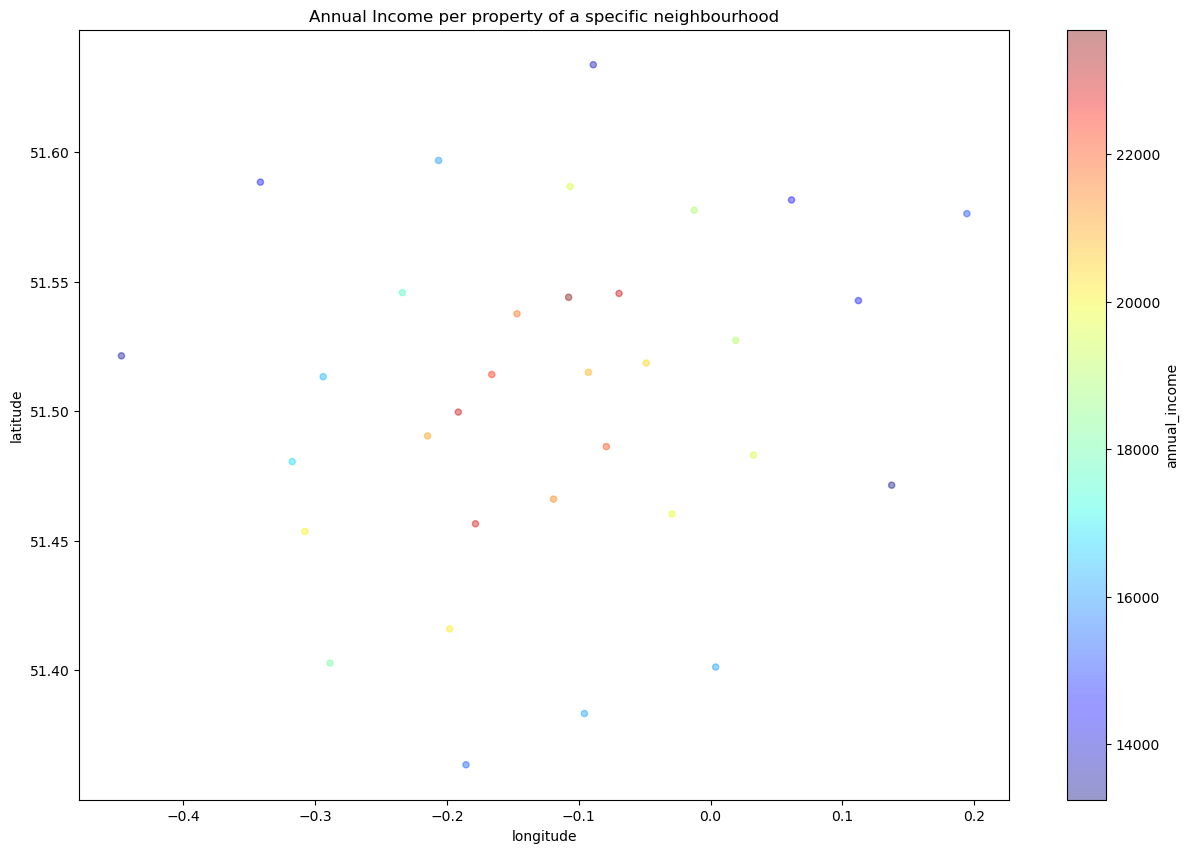

In [114]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=pred.plot(kind='scatter', x='longitude', y='latitude', c='annual_income', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Annual Income per property of a specific neighbourhood")
plt.show()

In [98]:
pred.describe()

Unnamed: 0   latitude  longitude  annual_income        total
count    33.00000  33.000000  33.000000      33.000000    33.000000
mean     16.00000  51.505449  -0.121385   18522.243314  1364.121212
std       9.66954   0.065802   0.145878    3210.674341  1362.394165
min       0.00000  51.363522  -0.446818   13246.838710    93.000000
25%       8.00000  51.466042  -0.206281   16080.697007   297.000000
50%      16.00000  51.514125  -0.107686   19068.907051   802.000000
75%      24.00000  51.545410  -0.029333   21059.541615  2439.000000
max      32.00000  51.633674   0.194335   23685.288575  4726.000000

In [99]:
pred['annual_income_taxdeduc']=pred['annual_income']*0.0534
pred['annual_income_airbnbdeduc']=pred['annual_income']*0.03
pred['finl_income']=pred['annual_income']-pred['annual_income_taxdeduc']-pred['annual_income_airbnbdeduc']


In [100]:
pred.describe()

Unnamed: 0   latitude  longitude  annual_income        total  \
count    33.00000  33.000000  33.000000      33.000000    33.000000   
mean     16.00000  51.505449  -0.121385   18522.243314  1364.121212   
std       9.66954   0.065802   0.145878    3210.674341  1362.394165   
min       0.00000  51.363522  -0.446818   13246.838710    93.000000   
25%       8.00000  51.466042  -0.206281   16080.697007   297.000000   
50%      16.00000  51.514125  -0.107686   19068.907051   802.000000   
75%      24.00000  51.545410  -0.029333   21059.541615  2439.000000   
max      32.00000  51.633674   0.194335   23685.288575  4726.000000   

       annual_income_taxdeduc  annual_income_airbnbdeduc   finl_income  
count               33.000000                  33.000000     33.000000  
mean               989.087793                 555.667299  16977.488221  
std                171.450010                  96.320230   2942.904101  
min                707.381187                 397.405161  12142.052361  
25%                858.709220                 482.420910  14739.566877  
50%               1018.279637                 572.067212  17478.560203  
75%               1124.579522                 631.786248  19303.175845  
max               1264.794410                 710.558657  21709.935508

In [101]:
pred.to_csv('pred2.csv')

In [102]:
listng=pd.read_csv('listings.csv')

In [103]:
listing.describe()

id       host_id      latitude     longitude         price  \
count  6.484200e+04  6.484200e+04  64842.000000  64842.000000  64842.000000   
mean   2.379903e+07  8.686224e+07     51.509761     -0.128158    115.930092   
std    1.189096e+07  9.057742e+07      0.045444      0.091707    241.596545   
min    1.391300e+04  4.775000e+03     51.294790     -0.494850      0.000000   
25%    1.479521e+07  1.433389e+07     51.485850     -0.187730     45.000000   
50%    2.413315e+07  4.687934e+07     51.514080     -0.125155     80.000000   
75%    3.436871e+07  1.425708e+08     51.536950     -0.070340    130.000000   
max    4.311927e+07  3.432172e+08     51.681690      0.268950  19985.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    64842.000000       64842.000000       64842.000000   
mean         4.067703          23.348540           0.963183   
std         18.474259          41.550896           1.177591   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.200000   
50%          2.000000           9.000000           0.560000   
75%          3.000000          25.000000           1.270000   
max       1124.000000         773.000000          22.690000   

       calculated_host_listings_count  availability_365  
count                    64842.000000      64842.000000  
mean                        15.249314        116.137025  
std                         75.150897        133.053772  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          2.000000         66.000000  
75%                          5.000000        235.000000  
max                        928.000000        365.000000

In [104]:
ins=pd.read_excel('investment.xlsx')

In [105]:
ins.head()

Borough  Average   latitude  longitude
0  Barking and Dagenham   298620  51.542645   0.112094
1                Barnet   519611  51.596730  -0.206281
2                Bexley   336858  51.471405   0.137298
3                 Brent   474513  51.545745  -0.233753
4               Bromley   436460  51.401224   0.003821

In [106]:
pred.head()

Unnamed: 0   latitude  longitude         neighbourhood  annual_income  \
0           0  51.542645   0.112094  Barking and Dagenham   14448.704698   
1           1  51.596730  -0.206281                Barnet   16080.697007   
2           2  51.471405   0.137298                Bexley   13246.838710   
3           3  51.545745  -0.233753                 Brent   17620.311899   
4           4  51.401224   0.003821               Bromley   16085.282828   

    total  annual_income_taxdeduc  annual_income_airbnbdeduc   finl_income  
0   149.0              771.560831                 433.461141  13243.682726  
1   802.0              858.709220                 482.420910  14739.566877  
2    93.0              707.381187                 397.405161  12142.052361  
3  1353.0              940.924655                 528.609357  16150.777887  
4   297.0              858.954103                 482.558485  14743.770240

In [107]:
ins['total']=pred['total']
ins['finl_income']=pred['finl_income']
ins.head()

Borough  Average   latitude  longitude   total   finl_income
0  Barking and Dagenham   298620  51.542645   0.112094   149.0  13243.682726
1                Barnet   519611  51.596730  -0.206281   802.0  14739.566877
2                Bexley   336858  51.471405   0.137298    93.0  12142.052361
3                 Brent   474513  51.545745  -0.233753  1353.0  16150.777887
4               Bromley   436460  51.401224   0.003821   297.0  14743.770240

In [108]:
ins['returns']=ins['Average']/ins['finl_income']
ins.head()

Borough  Average   latitude  longitude   total   finl_income  \
0  Barking and Dagenham   298620  51.542645   0.112094   149.0  13243.682726   
1                Barnet   519611  51.596730  -0.206281   802.0  14739.566877   
2                Bexley   336858  51.471405   0.137298    93.0  12142.052361   
3                 Brent   474513  51.545745  -0.233753  1353.0  16150.777887   
4               Bromley   436460  51.401224   0.003821   297.0  14743.770240   

     returns  
0  22.548109  
1  35.252800  
2  27.743086  
3  29.380195  
4  29.603012

In [109]:
ins.to_csv('returns.csv')

<Figure size 3000x2000 with 0 Axes>

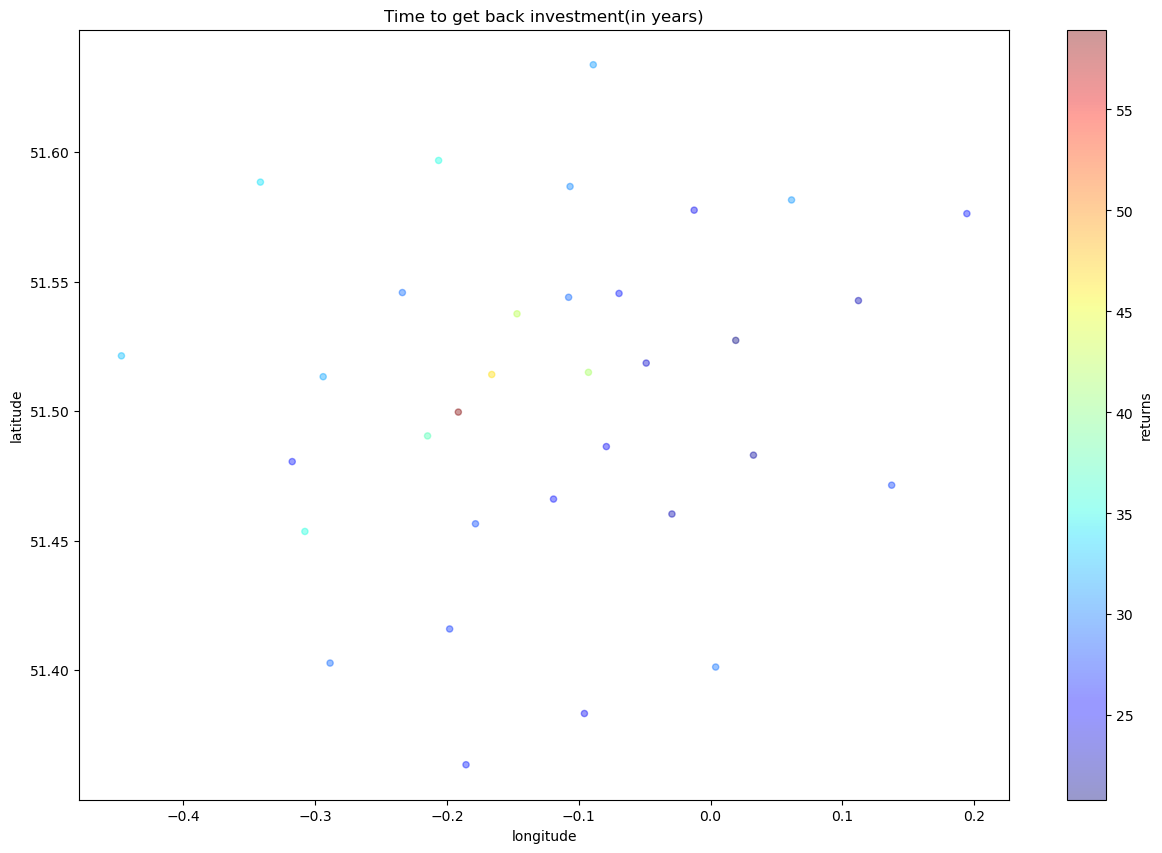

In [115]:
plt.figure(figsize=(15,10),dpi=200)
listing_map=ins.plot(kind='scatter', x='longitude', y='latitude', c='returns', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Time to get back investment(in years)")
plt.show()